# Personal Injury Prediction In Traffic Accidents - Montgomery County, MD

- Chenchen Feng

## Project Goals

* The goal is by analyzing the past ten years traffic accident records Montgomery county Maryland. Find the key drivers of personal injury in those traffic accidents. Make recommendation to the police department to better prediction on personal injury in traffic accident so the casualty would get be treated as learly as possible.

## Project Description
* In this report, I will use 2012-01-01 to 2022-08-15 Montgomery county (MD) traffic violation's data. Use classification machine learning method develop a model to predict personal injury in traffic accidents. It will help the police department has a better preparation of the medical resources for casualties in accidents.
* In the end, I will give out the recommendations for data collection system and next step I would like to take.

## Initial Questions

1. Does personal injury in accident related to the hour? day of week? month? year?
2. Does the personal injury in accident rate related to race and gender?
3. What about the relationship between personal injury and Violation Type? achohol?
4. Does persoonal injury in accident has relationship with agency location?
5. Is property damage has relationship with personal injury?

## Data Dictionary

* Date Of Stop: Date of the traffic violation.
* Time Of Stop: Time of the traffic violation.
* SubAgency: Court code representing the district of assignment of the officer. 
* Belts: YES if seat belts were in use in accident cases.
* Personal Injury: Yes if traffic violation involved Personal Injury.
* Property Damage: Yes if traffic violation involved Property Damage.
* Alcohol: Yes if the traffic violation included an alcohol related suspension.
* Violation Type: Violation type. (Examples: Warning, Citation, SERO)
* Contributed To Accident: If the traffic violation was a contributing factor in an accident.
* Race: Race of the driver. (Example: Asian, Black, White, Other, etc.)
* Gender: Gender of the driver (F = Female, M = Male)

## Library will be uesed

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

## Wrangle Zillow Data
To acquire the Montgomery county traffic violation data, I did the following two steps:
1. Download the CSV file from https://data.montgomerycountymd.gov/Public-Safety/Traffic-Violations/4mse-ku6q.
2. Import CSV file to jupyter notebook.
* Data period: 2012-01-01 to 2022-08-15, if you want to download the data and run the notebook, be aware the date.

In [2]:
import acquire
df = acquire.acquire_data()

To clean the data, I did flowing steps:
1. drop columns
2. check null value
3. convert time format
4. set the time to index and create new columns for year, month, day of the week and hour
5. convert the boolean value into int: Contributed to accident
6. drop rows: SubAgency S15 only has 3 rows and W15 only have 7 rows.
7. get all the data related to accident.

In [3]:
import prepare
df = prepare.clean_data(df)

Split the data into train 56%, validate 24%, test 20%.
* Our data is now split into 3 samples so that we can use the train sample to explore, fit to models and evaluate without looking at new data.
* The validate is used to verify that our models built are not overfit to the train dataset and get the best model.
* The test set is used to give an estimate of how this model will perform on data is has never seen in the future.

In [4]:
train, validate, test = prepare.split_data(df)
train.shape, validate.shape, test.shape

((26922, 13), (11538, 13), (9616, 13))

## Data Context

There are 48,076 accident related in Montgomery county, Maryland traffic violation records. 

Data time range is from 2012-01-01 to 2022-08-15. 

Due to COVID, the traffic violation and accident number reduce a lot from 2020.

<AxesSubplot:xlabel='year', ylabel='Count'>

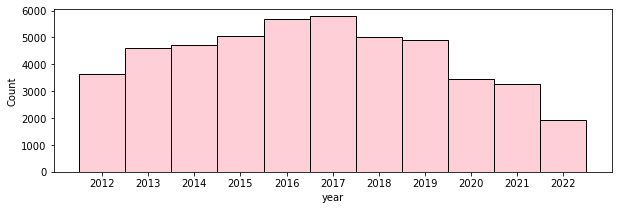

In [101]:
# hist plot for total accidents count from 2012-01-01 to 2022-08-15 in the total traffic violation records
plt.rcParams["figure.figsize"] = (10,3)
sns.histplot(df.year.sort_index(ascending=True), color = 'pink')

<AxesSubplot:xlabel='Gender', ylabel='Count'>

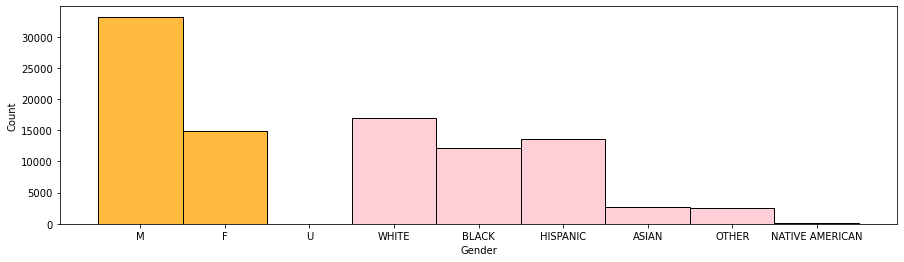

In [107]:
# accidents number by the race and gender
plt.rcParams["figure.figsize"] = (15,4)
sns.histplot(df.Gender.sort_index(ascending=True), color = 'orange')
sns.histplot(df.Race.sort_index(ascending=True), color = 'pink')

* Takeaway: males are more likely to have accident than females. White people group has the highest accident number.

## Explore

### 1.  Does personal injury in accident related to the hour? day of week? month? year?

<AxesSubplot:xlabel='month', ylabel='Count'>

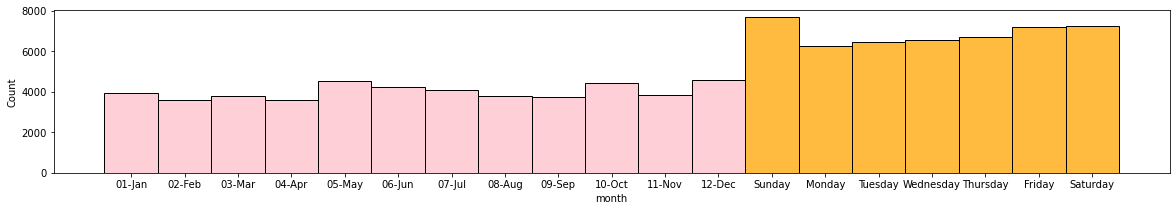

In [111]:
plt.rcParams["figure.figsize"] = (20,3)
sns.histplot(df.month.sort_index(ascending=True), color = 'pink')
sns.histplot(df.day_of_week.sort_index(ascending=True), color = 'orange')

<AxesSubplot:xlabel='hour', ylabel='Count'>

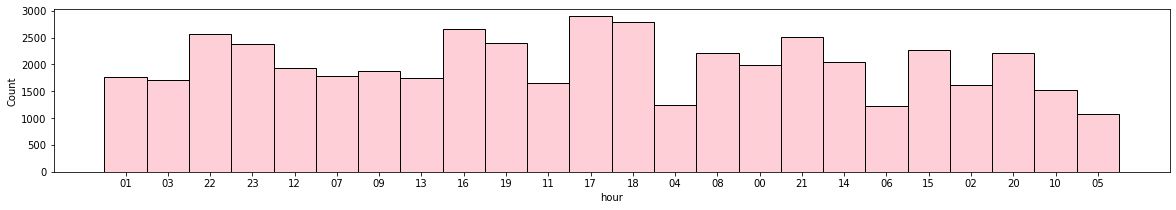

In [112]:
plt.rcParams["figure.figsize"] = (20,3)
sns.histplot(df.hour.sort_index(ascending=True), color = 'pink')

* Holiday season and summer time has more accidents happen.
* Sunday has the highest number of accident.
* Accidents happen more in the rush hours in Montgonery county.

<AxesSubplot:ylabel='year'>

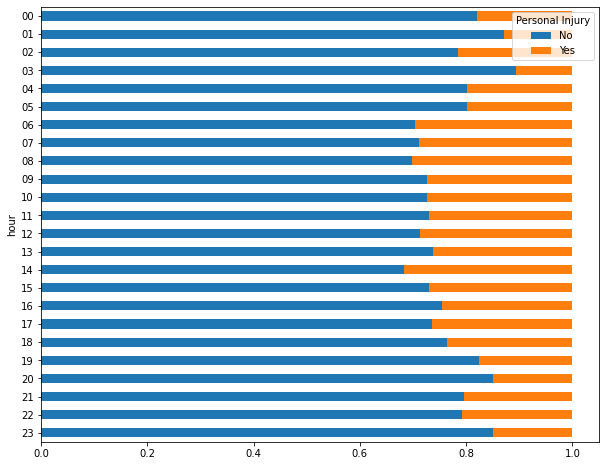

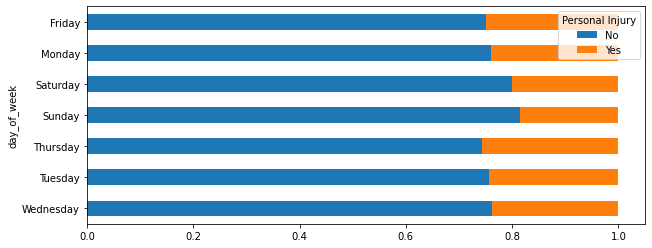

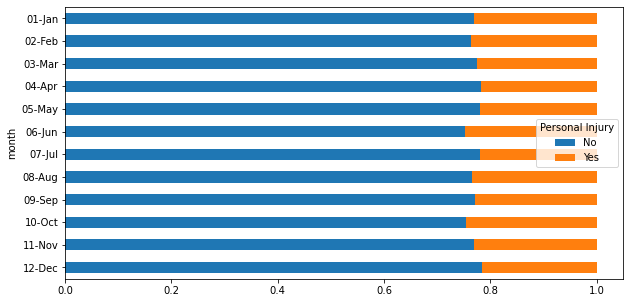

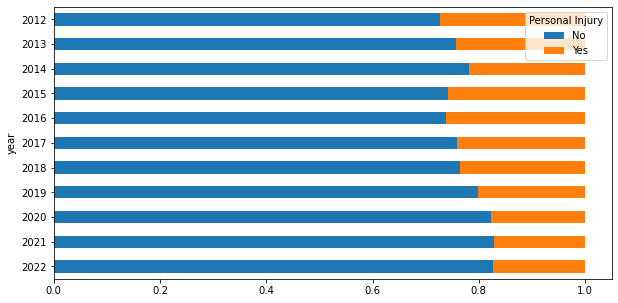

In [22]:
# create hour, day of week, month and year crosstab tables
hour = pd.crosstab(train.hour, train['Personal Injury'], normalize = 'index').sort_index(ascending=False)
day_of_week = pd.crosstab(train.day_of_week, train['Personal Injury'], normalize = 'index').sort_index(ascending=False)
month = pd.crosstab(train.month, train['Personal Injury'], normalize = 'index').sort_index(ascending=False)
year = pd.crosstab(train.year, train['Personal Injury'], normalize = 'index').sort_index(ascending=False)

# plot chart for each table to show the percentage of personal injury
hour.plot.barh(stacked = True, figsize = (10, 8), fontsize = 10)
day_of_week.plot.barh(stacked = True, figsize = (10, 4), fontsize = 10)
month.plot.barh(stacked = True, figsize = (10, 5), fontsize = 10)
year.plot.barh(stacked = True, figsize = (10, 5), fontsize = 10)

* Let's run statistic tests for day of week and hours

In [113]:
observed1 = pd.crosstab(train.day_of_week, train['Personal Injury'])
chi21, p1, degf1, expected1 = stats.chi2_contingency(observed1)

alpha = 0.05
if p1 < alpha:
    print("We reject the null hypothesis, they are dependent.")
else:
    print("We fail to reject the null hypothesis, they are independent.")

We reject the null hypothesis, they are dependent.


In [114]:
observed2 = pd.crosstab(train.hour, train['Personal Injury'])
chi22, p2, degf2, expected2 = stats.chi2_contingency(observed2)

alpha = 0.05
if p2 < alpha:
    print("We reject the null hypothesis, they are dependent.")
else:
    print("We fail to reject the null hypothesis, they are independent.")

We reject the null hypothesis, they are dependent.


### Answer:
* Hour: most personal injury accidents happen during the day time, from 06:00 - 18:00.
* Day of week: weekends seems has less perosonal injury accidents even weekends have more accidents number.
* Month: June and Octobr have the hightest personal injury rate in accidents just the same as accidents number.
* Year: 2020-2022 have the lowest rate because COVID started from the beginning of 2020 and accidents number reduced a lot due to COVID.

### 2. Does the personal injury in accident rate related to race and gender?

<AxesSubplot:xlabel='Gender', ylabel='Count'>

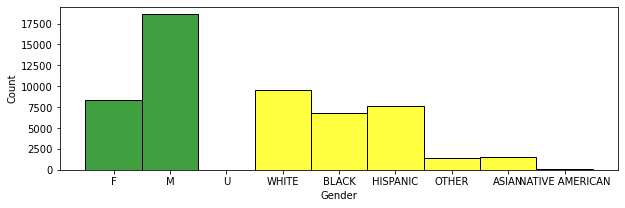

In [35]:
# gender and race count for accident
plt.rcParams["figure.figsize"] = (10,3)
sns.histplot(train.Gender, color = 'green')
sns.histplot(train.Race, color = 'yellow')

<AxesSubplot:ylabel='Race'>

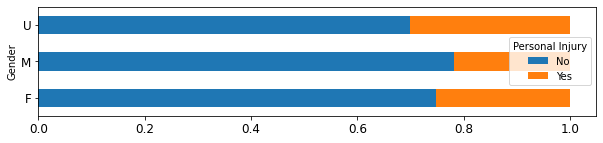

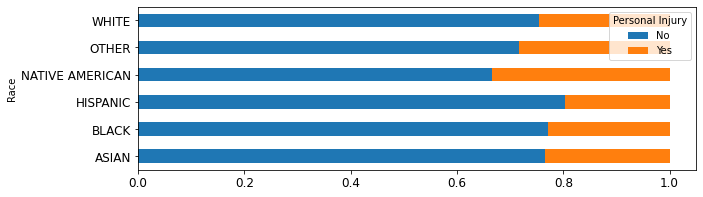

In [32]:
race = pd.crosstab(train.Race, train['Personal Injury'], normalize = 'index')
gender = pd.crosstab(train.Gender, train['Personal Injury'], normalize = 'index')

gender.plot.barh(stacked = True, figsize = (10, 2), fontsize = 12)
race.plot.barh(stacked = True, figsize = (10, 3), fontsize = 12)

### Answer:
* Gender: males accident number is more than double of the female, but the female's personal injury rate is higher than males.
* Race: according to the race count and persoonal injury rate in accident, white people should be the highest one.

### 3. What about the relationship between personal injury and Violation Type? achohol?

<AxesSubplot:ylabel='Alcohol'>

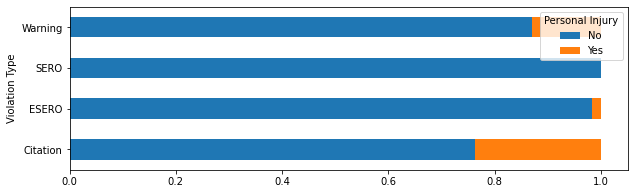

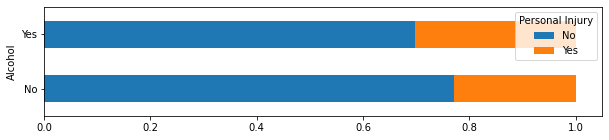

In [40]:
violation = pd.crosstab(train['Violation Type'], train['Personal Injury'], normalize = 'index')
alcohol = pd.crosstab(train.Alcohol, train['Personal Injury'], normalize = 'index')

violation.plot.barh(stacked = True, figsize = (10, 3), fontsize = 10)
alcohol.plot.barh(stacked = True, figsize = (10, 2), fontsize = 10)

### Answer:
* Violation Type: Citation and warning are the highest two, it might because citation has the highest accident counts.
* Alcohol: alcohol related accident has more chance to cause personal injury.

### 4. Does persoonal injury in accident has relationship with agency location?

<AxesSubplot:ylabel='SubAgency'>

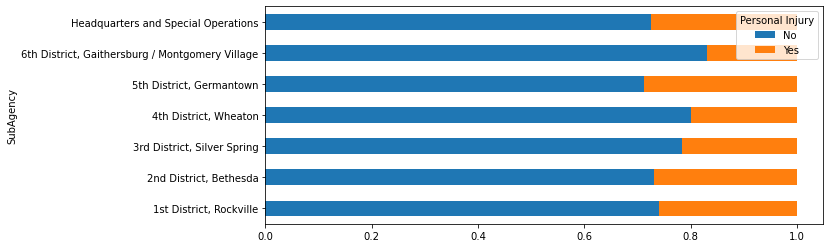

In [41]:
agency = pd.crosstab(train['SubAgency'], train['Personal Injury'], normalize = 'index')
agency.plot.barh(stacked = True, figsize = (10, 4), fontsize = 10)

In [115]:
observed3 = pd.crosstab(train.SubAgency, train['Personal Injury'])
chi23, p3, degf3, expected3 = stats.chi2_contingency(observed1)

alpha = 0.05
if p3 < alpha:
    print("We reject the null hypothesis, they are dependent.")
else:
    print("We fail to reject the null hypothesis, they are independent.")

We reject the null hypothesis, they are dependent.


### Answer:
* Different locations has different rate of persoonal injury, they are dependent. Germantown is the highest one.

### 5. Is property damage has relationship with personal injury?

<AxesSubplot:xlabel='Property Damage', ylabel='Count'>

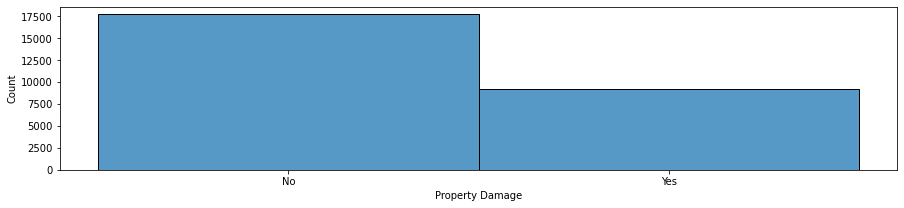

In [46]:
sns.histplot(train['Property Damage'].sort_index(ascending=True))

<AxesSubplot:ylabel='Property Damage'>

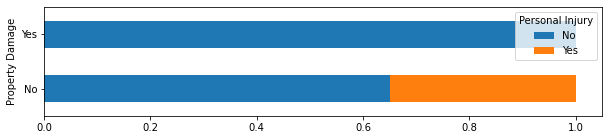

In [47]:
damage = pd.crosstab(train['Property Damage'], train['Personal Injury'], normalize = 'index')
damage.plot.barh(stacked = True, figsize = (10, 2), fontsize = 10)

### Answer:
* it seems property damage and personal injury has no relationship.

## Summary

Race, gender, alcohol, agency location and all the time features all have relationship with personal injury in traffic accidents. Also violation type is related to our target variable personal injury. Since violation type is an outcome of traffic violation, personal injury is also an outcome. I prefer to not use one outcome to predic another outcome.
* Feature will be used for feature engineering will be:

    Alcohol, race, gender, subagency, hour, day of week, month

## Feature Engineering

In [48]:
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector

# split the train first
x_train_feature = train[['Alcohol', 'Race','day_of_week', 'hour','Gender','SubAgency','month']]
y_train_feature = train[['Personal Injury']]

# get dummy variables 
x_train_dummy_feature = pd.get_dummies(x_train_feature)
y_train_dummy_feature = pd.get_dummies(y_train_feature, drop_first=True)

In [49]:
# use select k best method to select top 10 attributes
kbest = SelectKBest(f_regression, k=10)
kbest.fit(x_train_dummy_feature, y_train_dummy_feature)
x_train_dummy_feature.columns[kbest.get_support()]

Index(['Race_HISPANIC', 'day_of_week_Sunday', 'hour_01', 'hour_03', 'hour_14',
       'hour_23', 'SubAgency_2nd District, Bethesda',
       'SubAgency_4th District, Wheaton', 'SubAgency_5th District, Germantown',
       'SubAgency_6th District, Gaithersburg / Montgomery Village'],
      dtype='object')

* select k best: race, day of week, hour, subagency

In [51]:
# use RFE method to select top 10 attributes
from sklearn.linear_model import LinearRegression
model = LinearRegression()
rfe = RFE(model, n_features_to_select=10)
rfe.fit(x_train_dummy_feature, y_train_dummy_feature)
x_train_dummy_feature.columns[rfe.get_support()]

Index(['month_01-Jan', 'month_02-Feb', 'month_03-Mar', 'month_04-Apr',
       'month_05-May', 'month_07-Jul', 'month_08-Aug', 'month_09-Sep',
       'month_11-Nov', 'month_12-Dec'],
      dtype='object')

* RFE: month

## Modeling

* Because personal injury in accident is a boolean/yes or no value, I will use classification machine learning algorithms to fit to the training data and evaluate on validate set.
* Here I will use race, agency location, hour, week of day and month as my features. Then built four different model with same features.
    1. KNN
    2. Decision tree
    3. Random forest
    4. Logistic refression

For the metric, I will use F1 score because I want to minimize all the false prediction. If there is personal injury in accident but we don't sent out medical assistance, it might cause the casualty couldn't get treatment in time. Or thre is no personal inury but we send the medical assistance, it will cause wasting  of resources.
* For calculating F1 score, I created a function in prepare.py



In [5]:
# import libraries for modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

### Baseline

In [6]:
# find the mode of personal injury for baseline
train['Personal Injury'].value_counts()

No     20757
Yes     6165
Name: Personal Injury, dtype: int64

In [7]:
# set baseline on train and validate, also calculate the accuracy
train['baseline'] = 'No'
baseline_accuracy_train = (train['Personal Injury'] == train.baseline).mean()
print(f'baseline accuracy on train set: {baseline_accuracy_train:.2%}')
validate['baseline'] = 'No'
baseline_accuracy_validate = (validate['Personal Injury'] == validate.baseline).mean()
print(f'baseline accuracy on validate set: {baseline_accuracy_validate:.2%}')

baseline accuracy on train set: 77.10%
baseline accuracy on validate set: 77.53%


In [16]:
# slpit train, validate and test data before modeling
x_train = train[['Race','day_of_week', 'hour','month','SubAgency']]
y_train = train[['Personal Injury']]
x_validate = validate[['Race','day_of_week', 'hour','month','SubAgency']]
y_validate = validate[['Personal Injury']]
x_test = test[['Race','day_of_week', 'hour','month','SubAgency']]
y_test = test[['Personal Injury']]

x_train = pd.get_dummies(x_train, drop_first=True)
y_train = pd.get_dummies(y_train, drop_first=True)
x_validate = pd.get_dummies(x_validate, drop_first=True)
y_validate = pd.get_dummies(y_validate, drop_first=True)
x_test = pd.get_dummies(x_test, drop_first=True)
y_test = pd.get_dummies(y_test, drop_first=True)

## Train
1. KNN
2. Decision tree
3. Random forest
4. Logistic regression

### 1. KNN

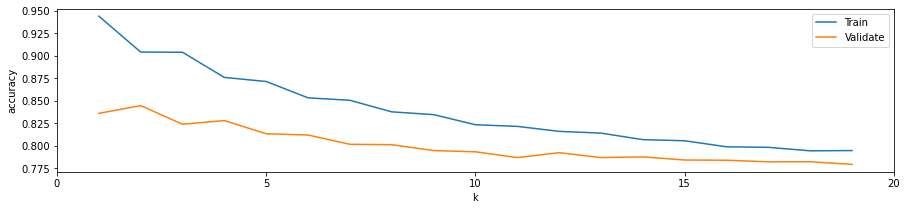

In [65]:
# first we need to find the best K number for our model
k_range = range(1, 20)
train_scores = []
validate_scores = []
for k in k_range:
    # make the modek
    knn = KNeighborsClassifier(n_neighbors = k)
    # fit the model (on train and only train)
    knn.fit(x_train, y_train)
    train_scores.append(knn.score(x_train, y_train))
    validate_scores.append(knn.score(x_validate, y_validate))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_range, train_scores, label='Train')
plt.plot(k_range, validate_scores, label='Validate')
plt.legend()
plt.xticks([0,5,10,15,20])
plt.show()

* k = 12 is the best

In [35]:
# make the knn model with the best k number
knn = KNeighborsClassifier(n_neighbors=12, weights='uniform')

# fit the model on the x_train
knn.fit(x_train, y_train)

# get prediction
predictions = knn.predict(x_train)
print(classification_report(y_train, predictions))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89     20757
           1       0.76      0.29      0.42      6165

    accuracy                           0.82     26922
   macro avg       0.79      0.63      0.65     26922
weighted avg       0.81      0.82      0.78     26922



In [36]:
print('Accuracy of KNN(k=12) classifier on training set: {:.2%}'
     .format(knn.score(x_train, y_train)))

Accuracy of KNN(k=12) classifier on training set: 81.61%


In [18]:
# use the function in prepare.py to calculate f1 score
prepare.f1_score(y_train, predictions)

0.41819464033850495

### 2. Decision Tree

In [73]:
# find the best max_depth number
metrics = []
for i in range(1, 30):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(x_train, y_train)

    # Use the model
    in_sample_accuracy = tree.score(x_train, y_train)
    
    out_of_sample_accuracy = tree.score(x_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
tree_mc = pd.DataFrame(metrics)
tree_mc["difference"] = tree_mc.train_accuracy - tree_mc.validate_accuracy
tree_mc

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.771005,0.775264,-0.004259
1,2,0.771005,0.775264,-0.004259
2,3,0.771339,0.775351,-0.004012
3,4,0.772157,0.776304,-0.004148
4,5,0.772825,0.775958,-0.003133
5,6,0.774311,0.776131,-0.001820
6,7,0.777060,0.775178,0.001882
7,8,0.779251,0.777431,0.001820
8,9,0.782148,0.778471,0.003677
9,10,0.786606,0.777778,0.008828


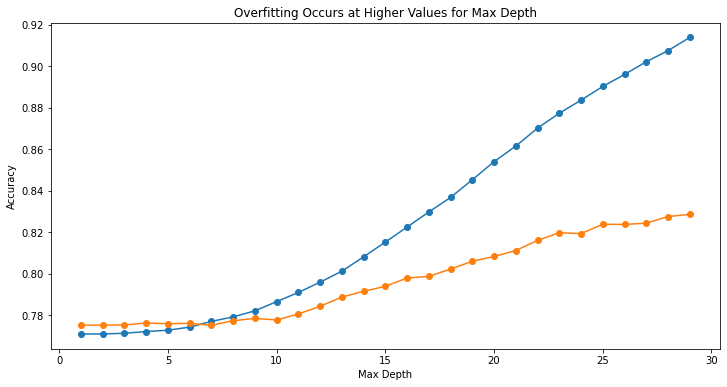

In [74]:
# viz for picking the best max_depth
plt.figure(figsize=(12, 6))
plt.plot(tree_mc.max_depth, tree_mc.train_accuracy, marker = 'o')
plt.plot(tree_mc.max_depth, tree_mc.validate_accuracy, marker = 'o')
plt.title('Overfitting Occurs at Higher Values for Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

* max_depth = 14

In [25]:
# step 1: Creat your recipe
tree = DecisionTreeClassifier(max_depth = 14, random_state=123)

# Step 2: Fit your model to your in-sample data (train)
tree.fit(x_train, y_train)

predictions1 = tree.predict(x_train)
print(classification_report(y_train, predictions1))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89     20757
           1       0.87      0.19      0.31      6165

    accuracy                           0.81     26922
   macro avg       0.84      0.59      0.60     26922
weighted avg       0.82      0.81      0.76     26922



In [26]:
print('Accuracy of decision tree1 (max_depth=14) classifier on train set: {:.2%}'
     .format(tree.score(x_train, y_train)))

Accuracy of decision tree1 (max_depth=14) classifier on train set: 80.82%


In [27]:
# use the function in prepare.py to calculate f1 score
prepare.f1_score(y_train, predictions1)

0.31420982735723774

### 3. Random forest

In [85]:
# find the best max_depth number
metrics = []

for i in range(10,40):
    # Make the model
    rf = RandomForestClassifier(max_depth=(i), 
                            min_samples_leaf=1,
                            random_state=123)
    # Fit the model (on train and only train)
    rf = rf.fit(x_train, y_train)
    # use the model
    in_sample_accuracy = rf.score(x_train, y_train)
    
    out_of_sample_accuracy = rf.score(x_validate, y_validate)
    
    output = {"max_depth": (i),"min_sample_lead" :1,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy}
        
    metrics.append(output)
    
rf_mc = pd.DataFrame(metrics)
rf_mc["difference"] = rf_mc.train_accuracy - rf_mc.validate_accuracy
rf_mc

,max_depth,min_sample_lead,train_accuracy,validate_accuracy,difference
0,10,1,0.772565,0.776304,-0.003739
1,11,1,0.773457,0.777084,-0.003628
2,12,1,0.776242,0.778298,-0.002055
3,13,1,0.779437,0.780118,-0.000681
4,14,1,0.783931,0.782371,0.001560
5,15,1,0.790766,0.786791,0.003974
6,16,1,0.797749,0.789912,0.007837
7,17,1,0.810564,0.799445,0.011119
8,18,1,0.822079,0.805426,0.016653
9,19,1,0.833370,0.811319,0.022051


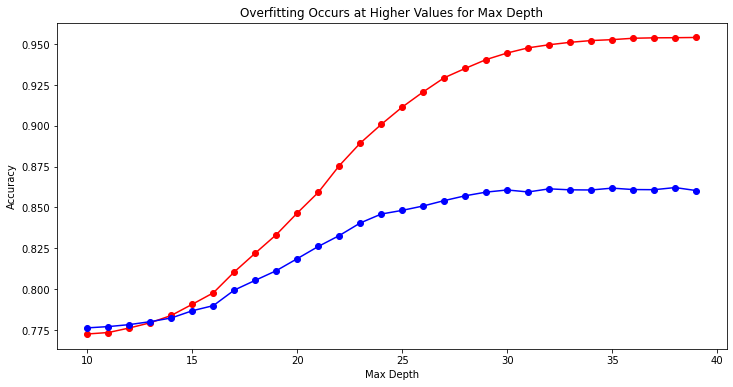

In [86]:
# viz for picking the best max_depth
plt.figure(figsize=(12, 6))
plt.plot(rf_mc.max_depth, rf_mc.train_accuracy, color = 'r', marker = 'o')
plt.plot(rf_mc.max_depth, rf_mc.validate_accuracy, color = 'b', marker = 'o')
plt.title('Overfitting Occurs at Higher Values for Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

* Max Depth = 19

In [29]:
# create the model
rf = RandomForestClassifier(max_depth=19, 
                            min_samples_leaf=1,
                            random_state=123)
# fit the model
rf.fit(x_train, y_train)
predictions2 = rf.predict(x_train)

print(classification_report(y_train, predictions2))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     20757
           1       0.97      0.28      0.43      6165

    accuracy                           0.83     26922
   macro avg       0.90      0.64      0.67     26922
weighted avg       0.86      0.83      0.80     26922



In [30]:
print('Accuracy of random forest (max_depth=19) classifier on train set: {:.2%}'
     .format(rf.score(x_train, y_train)))

Accuracy of random forest (max_depth=19) classifier on train set: 83.34%


In [31]:
# use the function in prepare.py to calculate f1 score
prepare.f1_score(y_train, predictions2)

0.43458532896395263

### 4. Logistic Regression

In [33]:
# Define the logistic regression model

logit = LogisticRegression(C=1, random_state=123)

#  fit the model on train data
logit.fit(x_train, y_train)

# now use the model to make predictions
predictions6 = logit.predict(x_train)

print(classification_report(y_train, predictions6))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87     20757
           1       0.00      0.00      0.00      6165

    accuracy                           0.77     26922
   macro avg       0.39      0.50      0.44     26922
weighted avg       0.59      0.77      0.67     26922



In [120]:
print('Accuracy of Logistic Regression (c=1) on train set: {:.2%}'
     .format(logit.score(x_train, y_train)))

Accuracy of Logistic Regression (c=1) on train set: 77.09%


####  Takeaway: 
* it seems logistic regression model doesn't perform well on imbalance data, there is no need to calculate the F1 score.

In [34]:
print(f'baseline accuracy on validate set: {baseline_accuracy_train:.2%}')
print('Accuracy of KNN (k = 12) classifier on validate set: {:.2%}'
     .format(knn.score(x_train, y_train)))
print('Accuracy of decision tree (max_depth = 14) classifier on validate set: {:.2%}'
     .format(tree.score(x_train, y_train)))
print('Accuracy of random forest (max_depth=19) classifier on validate set: {:.2%}'
     .format(rf.score(x_train, y_train)))
print('Accuracy of Logistic Regression (c=1) on train set: {:.2%}'
     .format(logit.score(x_train, y_train)))

baseline accuracy on validate set: 77.10%
Accuracy of KNN (k = 12) classifier on validate set: 81.61%
Accuracy of decision tree (max_depth = 14) classifier on validate set: 80.82%
Accuracy of random forest (max_depth=19) classifier on validate set: 83.34%
Accuracy of Logistic Regression (c=1) on train set: 77.09%


* Accuracy on train: 
    * baseline -- 77.10%
    1. KNN -- 81.61%
    2. Decision tree -- 80.82%
    3. Random forest -- 83.34%
    4. Logistic regression -- 77.09%
    

* F1 score on train:
    1. KNN -- 41.82%
    2. Decision tree -- 31.42%
    3. Random forest -- 43.46%

## Validate

In [37]:
# predict on validate
y_pred_knn_validate = knn.predict(x_validate)
y_pred_tree_validate = tree.predict(x_validate)
y_pred_rf_validate = rf.predict(x_validate)

# evaluate the accuracy on validate
print(f'baseline accuracy on validate set: {baseline_accuracy_validate:.2%}')
print('Accuracy of KNN (k = 12) classifier on validate set: {:.2%}'
     .format(knn.score(x_validate, y_validate)))
print('Accuracy of decision tree (max_depth = 14) classifier on validate set: {:.2%}'
     .format(tree.score(x_validate, y_validate)))
print('Accuracy of random forest (max_depth=19) classifier on validate set: {:.2%}'
     .format(rf.score(x_validate, y_validate)))

baseline accuracy on validate set: 77.53%
Accuracy of KNN (k = 12) classifier on validate set: 79.25%
Accuracy of decision tree (max_depth = 14) classifier on validate set: 79.16%
Accuracy of random forest (max_depth=19) classifier on validate set: 81.13%


In [42]:
# F1 score for KNN on validate
predictions3 = knn.predict(x_validate)
prepare.f1_score(y_validate, predictions3)

0.3072916666666667

In [40]:
# F1 score for tree on validate
predictions4 = tree.predict(x_validate)
prepare.f1_score(y_validate, predictions4)

0.2406062519734765

In [41]:
# F1 score for rf on validate
predictions5 = rf.predict(x_validate)
prepare.f1_score(y_validate, predictions5)

0.3117293708504584

* Accuracy on validate:     
    * baseline -- 77.53%
    1. KNN -- 79.25%
    2. Decision tree -- 79.08%
    3. Random forest -- 81.13%


* F1 score on validate:
    1. KNN -- 30.73%
    2. Decision tree -- 24.06%
    3. Random forest -- 31.17%
    
### Random forest is the best model

## Test - Random Forest

In [100]:
# predict on test
y_pred_test = rf.predict(x_test)

# evaluate on test
print('Accuracy of decision tree (max_depth = 19) on test set: {:.2%}'
     .format(rf.score(x_test, y_test)))

Accuracy of decision tree (max_depth = 19) on test set: 81.07%


### Expectation:
According to the test result, I expect the model will perform 81.07% accuracy in the future data if the data souce has no major change.

# Conclusion

## Summary
By analyzing the attributes of personal injury in Montgomery county (MD) traffic accidents. We built a Random forest model with max depth of 19 to predict the personal injury in accidents. The features I used for this model are race, agency location, hour, day of week and month. 
The accuracy for test model is 81.07%.

## Recommendations 

1. In the original data, the traffic violation describtion part has too many different variables (around 16000+). It's very hard to organize the describtion. But I think this is a very importnat feature for predicting the accidents and personal injury. Create more categories for seperating violations will be very helpful.


2. Montgomery county's raffic violation data doesn't have the age information. A lot more other places' records do have the age columns. I guess it's an important arribute and wish they can add age to the data.


3. For the accidents location, it will be better to have a city column instead of having detailed address. In this reprot, I use race to kind of estimating the location since some places do have more volume of certain race. But I don't think this method is accurate.

## Next Steps

1. I would like to organize the describtion into different categories to see if will help my model performce better.


2. Personal injury in the accident is not the only outcome from traffic violation. I would like to analyze more outcomes. Explore more differrent target variables from this data.